In [34]:
#Importing the necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

import sklearn.metrics as metrics
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [35]:
#Importing the data set 
col_names = ['PI','PT','LLA','SS','PR','DS','Class']
data = pd.read_csv('column_2C.dat',delimiter=' ',names=col_names)
data_bkp = pd.read_csv('column_2C.dat',delimiter=' ',names=col_names)
data.head()

,PI,PT,LLA,SS,PR,DS,Class
0,63.03,22.55,39.61,40.48,98.67,-0.25,AB
1,39.06,10.06,25.02,29.00,114.41,4.56,AB
2,68.83,22.22,50.09,46.61,105.99,-3.53,AB
3,69.30,24.65,44.31,44.64,101.87,11.21,AB
4,49.71,9.65,28.32,40.06,108.17,7.92,AB


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PI      310 non-null    float64
 1   PT      310 non-null    float64
 2   LLA     310 non-null    float64
 3   SS      310 non-null    float64
 4   PR      310 non-null    float64
 5   DS      310 non-null    float64
 6   Class   310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


Data Visualisation 

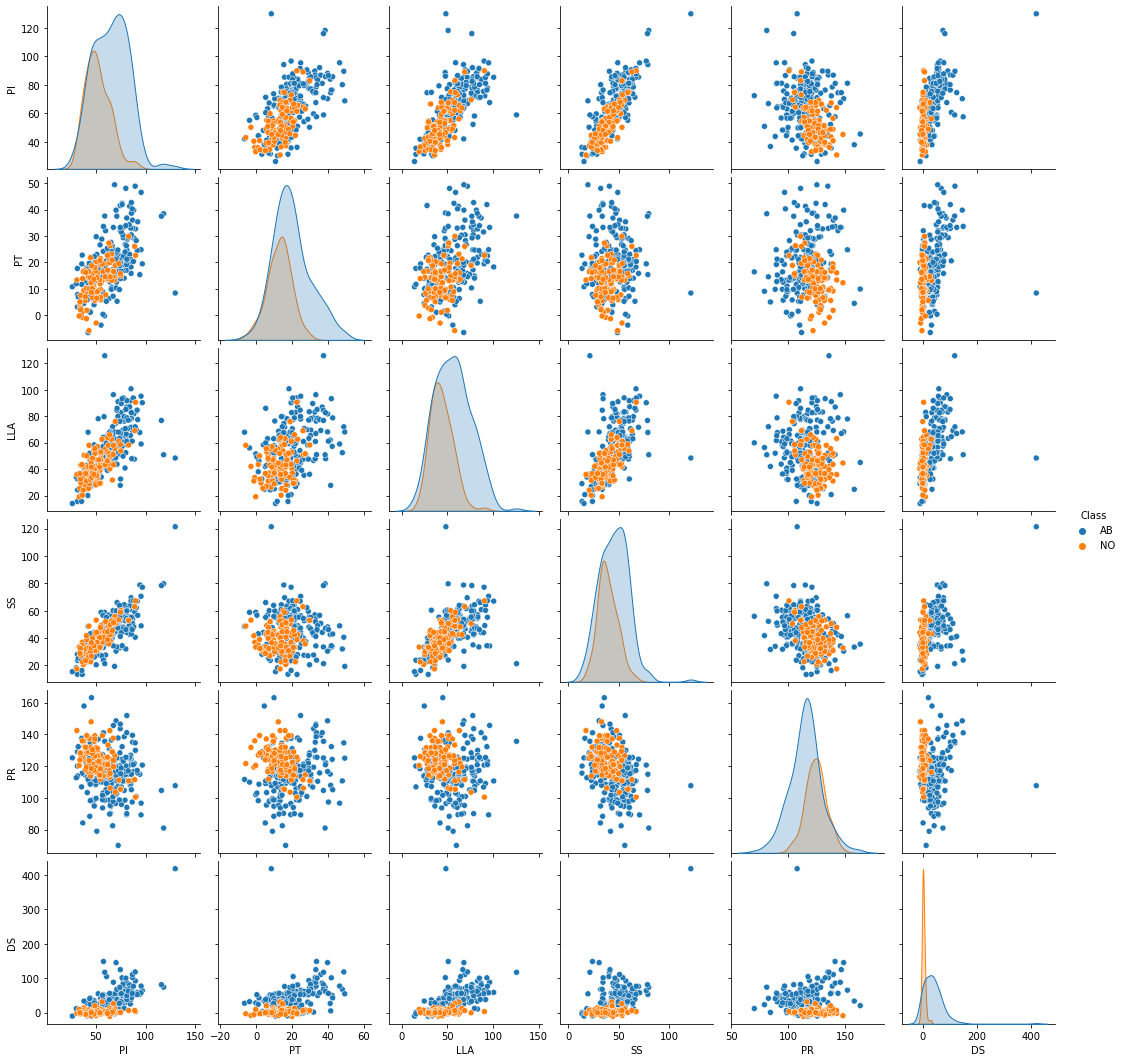

In [37]:
#Scatter plot for all features in the data  
sns.pairplot(data, hue="Class")
plt.show()

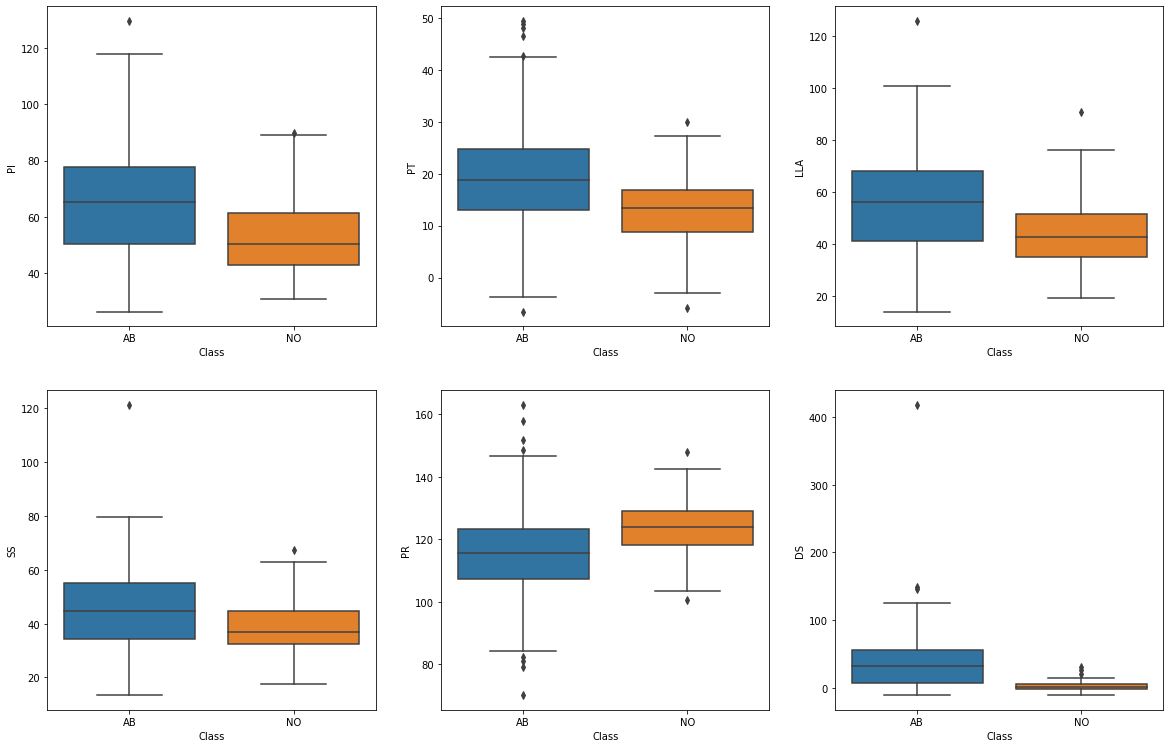

In [38]:
#Box plot for all features in the data  
plt.figure(figsize=(20,20))
j=1
for i in data.columns[:-1]:
    plt.subplot(3, 3, j)
    sns.boxplot(y=data[i],x=data['Class'],data=data)
    plt.ylabel(i)
    j=j+1

plt.show()

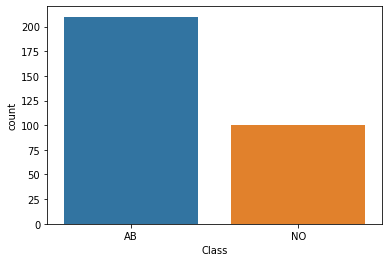

In [39]:
sns.countplot(x=data['Class'])
plt.show()

In [40]:
#Changing to numerical class 
data['class'] = 0
data.loc[data.Class =='AB' , 'class'] = 1

In [41]:
col = data.columns[:-2]
X = data[col]
y = data['class']
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)


In [42]:
print("Train Data Set",len(X_train))
print("Test Data Set",len(X_test))

Train Data Set 232
Test Data Set 78


In [43]:
#Computing the optimum value for K
error_rate = []
k = range(1,209)
for i in range(1,209):
     knn = KNeighborsClassifier(n_neighbors=i)
     knn.fit(X_train,y_train)
     pred_i = knn.predict(X_test)
     error_rate.append(np.mean(pred_i != y_test))

Minimum error:- 0.11538461538461539 at K = 15


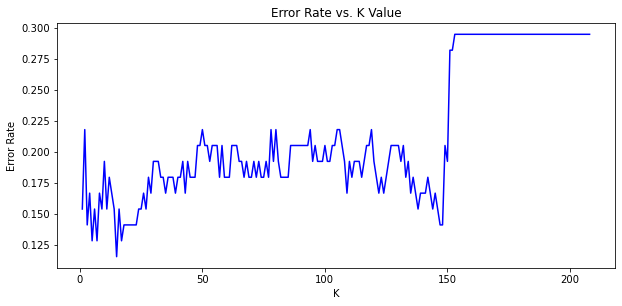

In [44]:
plt.figure(figsize=(10,4.5))
plt.plot(range(1,209),error_rate,color='blue')
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",k[error_rate.index(min(error_rate))])
x=k[error_rate.index(min(error_rate))]

In [45]:
#Traing the model with K = 15 which corresponds to minimum error rate
knn = KNeighborsClassifier(n_neighbors=x)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

In [46]:
print('Accuracy = {:.5f}'.format(metrics.accuracy_score(y_test, y_pred)))
print('Precision = {:.5f}'.format(metrics.precision_score(y_test, y_pred)))
print('Recall = {:.5f}'.format(metrics.recall_score(y_test, y_pred)))
print('F1 score = {:.5f}'.format(metrics.f1_score(y_test, y_pred)))

Accuracy = 0.88462
Precision = 0.92593
Recall = 0.90909
F1 score = 0.91743


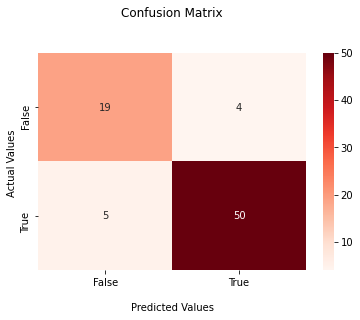

In [47]:
ax = sns.heatmap(metrics.confusion_matrix(y_test,y_pred), annot=True, cmap='Reds')

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()


Understanding Learning curves 

In [48]:
def Create_Test_Train(N,X,Y):
    X_train_LC = X.head(N)
    y_train_LC = Y.head(N)
    return X_train_LC,y_train_LC

In [49]:
def KNN_Optimal_k(N,X_train,y_train,X_val,y_val):
    error_rate=[]
    k = []
    for i in range(1,N):
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train,y_train)
        pred_i = knn.predict(X_val)
        error_rate.append(np.mean(pred_i != y_val))
        k.append(i)
    return min(error_rate),k[error_rate.index(min(error_rate))]

In [50]:
N = []
N_error_rate=[]
K=[]
for i in range(230,5,-2):
    X_train_LC,y_train_LC=Create_Test_Train(i,X_train,y_train)
    a,b=KNN_Optimal_k(i,X_train_LC,y_train_LC,X_test,y_test)
    N_error_rate.append(a)
    K.append(b)
    N.append(i)

Minimum error:- 0.10256410256410256 at K = 15
with Train Size 220


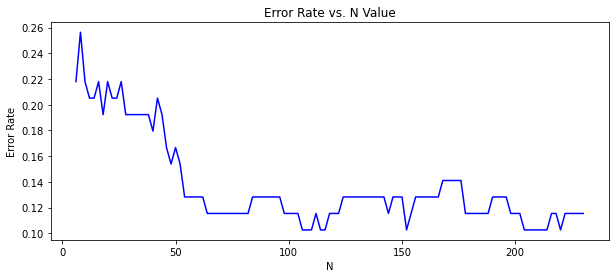

In [51]:
plt.figure(figsize=(10,4))
plt.plot(N,N_error_rate,color='blue')
plt.title('Error Rate vs. N Value')
plt.xlabel('N')
plt.ylabel('Error Rate')
print("Minimum error:-",min(N_error_rate),"at K =",K[N_error_rate.index(min(N_error_rate))])
print("with Train Size",N[N_error_rate.index(min(N_error_rate))])


Hyperparameters for KNN :- 

1. K value 
2. Distance Metric 
3. Weight Metric

Therefore, we will see how to the find the optimal values for these Hyperparameters to achieve minimum error rate using GridSearch Method.

In [52]:
col = data.columns[:-2]
X = data[col]
y = data['class']
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [53]:
from sklearn.model_selection import GridSearchCV

In [57]:
k= np.arange(1,50)
grid_params = { 'n_neighbors' : k,
               'p' :[1,2],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan','chebyshev']}
gs = GridSearchCV(KNeighborsClassifier(), grid_params, cv=5, n_jobs = -1,scoring='accuracy')
# fit the model on our train set
g_res = gs.fit(X_train, y_train)
# get the hyperparameters with the best score
print(g_res.best_params_)
# find the best score
print(g_res.best_score_)

{'metric': 'minkowski', 'n_neighbors': 15, 'p': 2, 'weights': 'distance'}
0.8451433857539316


Accuracy = 0.88462
Precision = 0.92593
Recall = 0.90909
F1 score = 0.91743


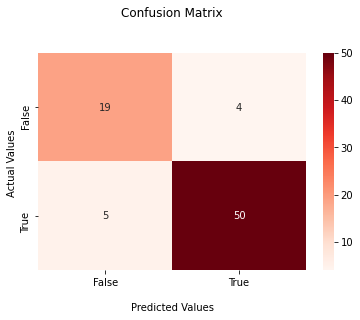

In [58]:

knn = KNeighborsClassifier(n_neighbors=15,weights='distance',metric='minkowski',p=2)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

print('Accuracy = {:.5f}'.format(metrics.accuracy_score(y_test, y_pred)))
print('Precision = {:.5f}'.format(metrics.precision_score(y_test, y_pred)))
print('Recall = {:.5f}'.format(metrics.recall_score(y_test, y_pred)))
print('F1 score = {:.5f}'.format(metrics.f1_score(y_test, y_pred)))

ax = sns.heatmap(metrics.confusion_matrix(y_test,y_pred), annot=True, cmap='Reds')

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()